<a href="https://colab.research.google.com/github/midleone/DI-Bootcamp/blob/main/week7/day3/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install ucimlrepo

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from ucimlrepo import fetch_ucirepo


In [29]:
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

print(adult.metadata)
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [30]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


In [33]:
min_max_scaler = MinMaxScaler()
X_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(X[numerical_features]), columns=numerical_features)

In [34]:
z_score_scaler = StandardScaler()
X_z_score_scaled = pd.DataFrame(z_score_scaler.fit_transform(X[numerical_features]), columns=numerical_features)

In [36]:
def plot_distributions(feature):
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(X[feature], kde=True)
    plt.title(f'Original {feature}')

    plt.subplot(1, 3, 2)
    sns.histplot(X_min_max_scaled[feature], kde=True)
    plt.title(f'Min-Max Scaled {feature}')

    plt.subplot(1, 3, 3)
    sns.histplot(X_z_score_scaled[feature], kde=True)
    plt.title(f'Z-Score Normalized {feature}')

    plt.tight_layout()
    plt.show()

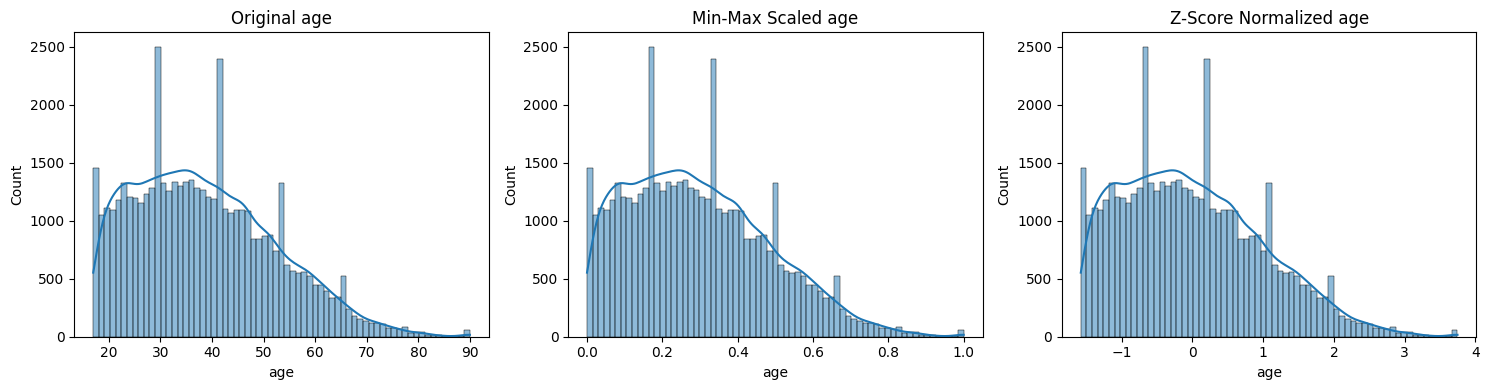

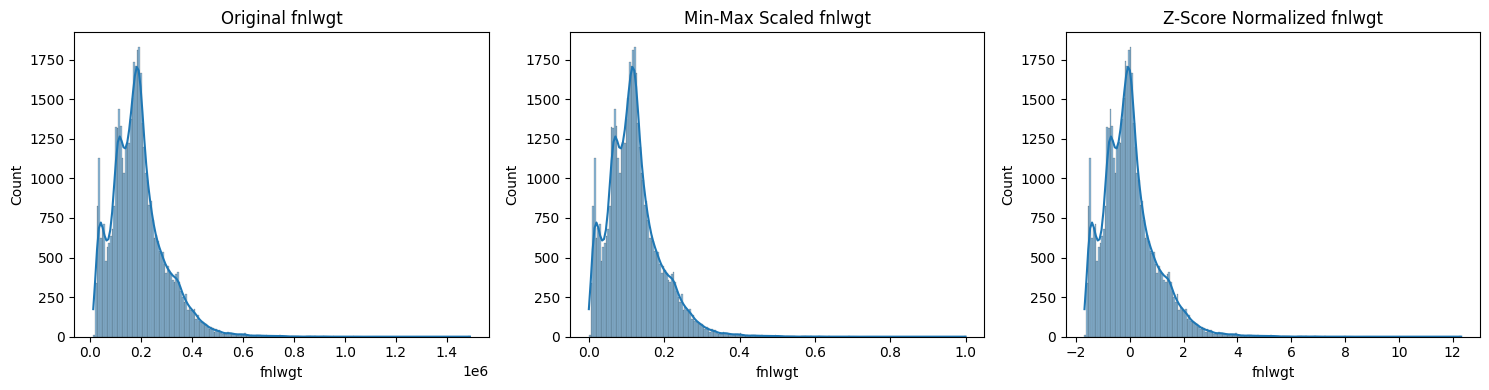

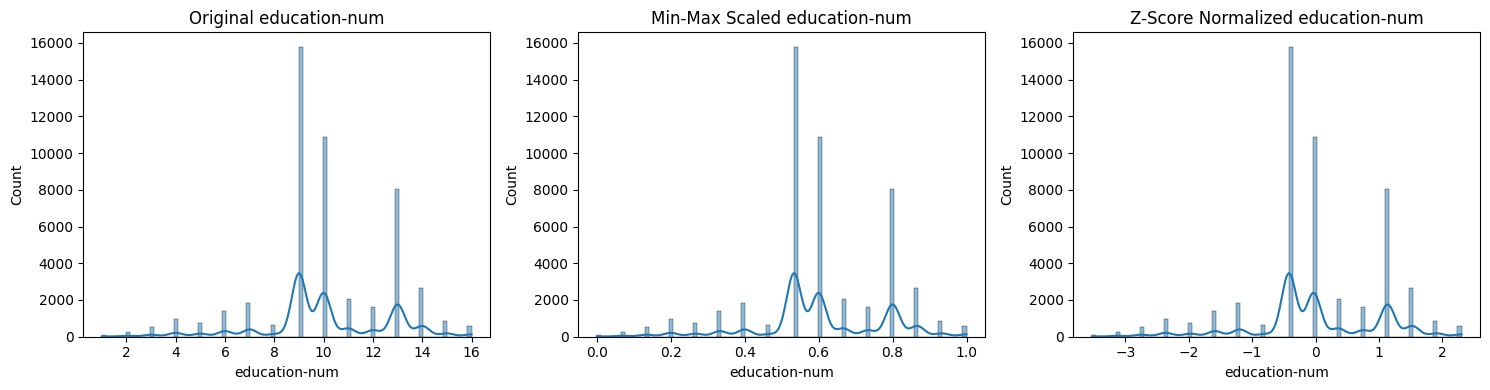

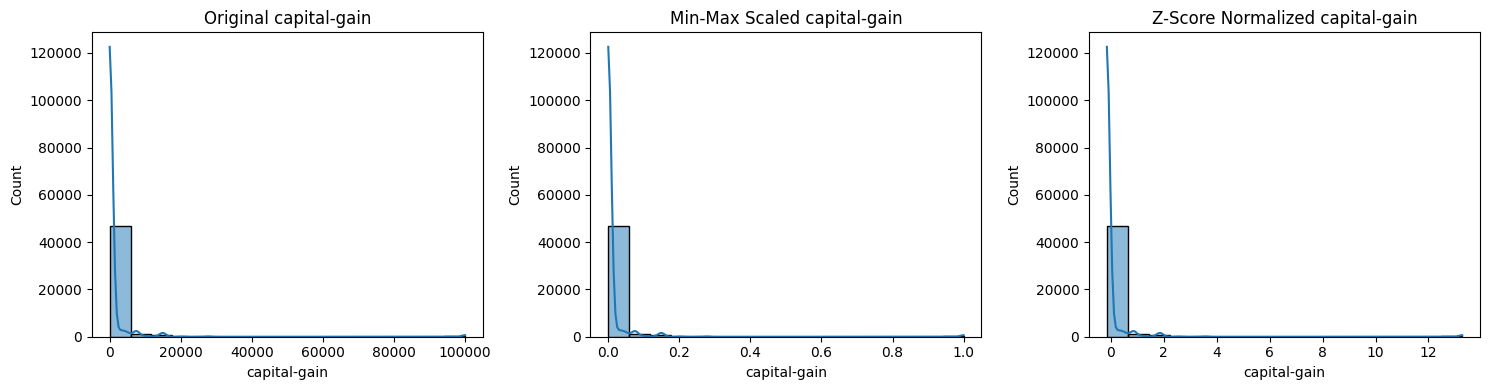

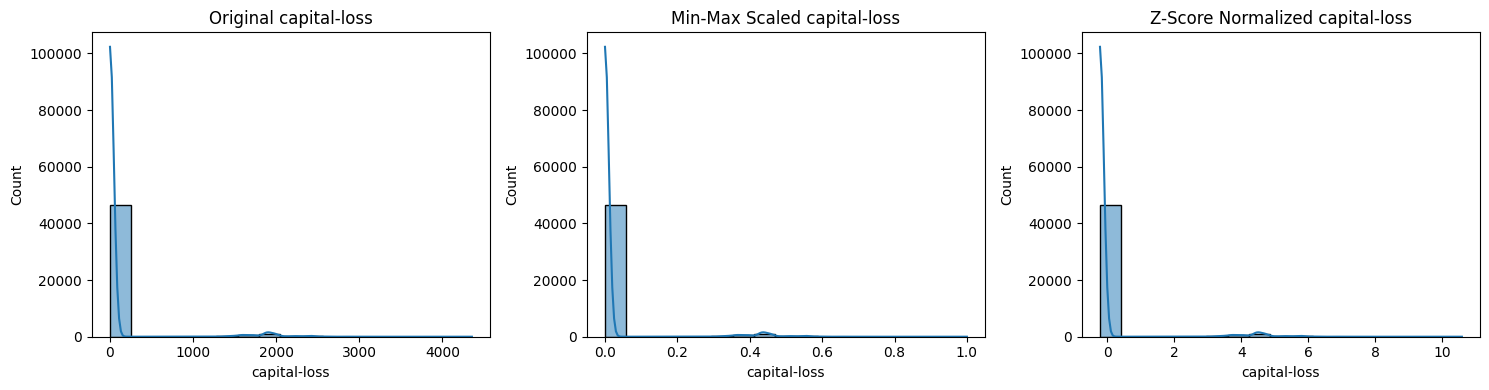

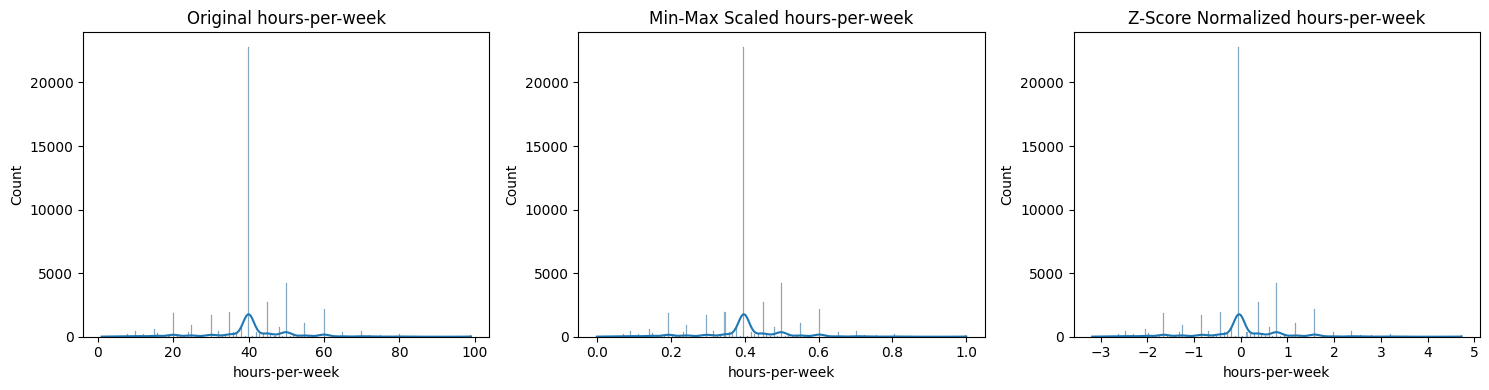

<ipython-input-37-13b805a81a9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = np.where(outliers[feature], np.median(X[feature]), X[feature])


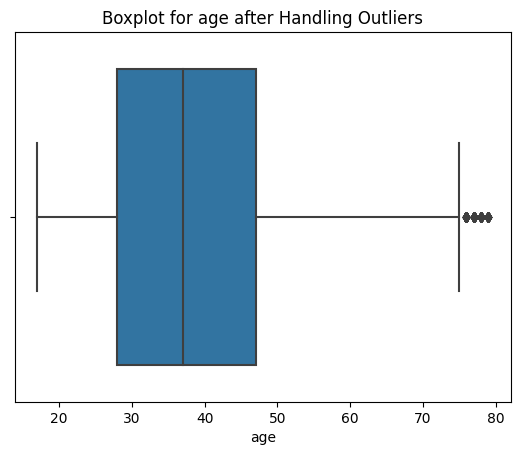

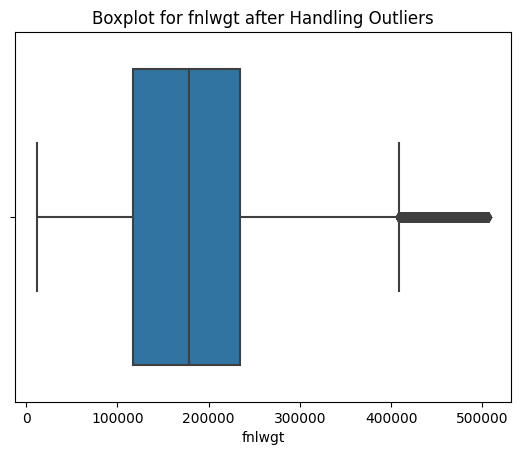

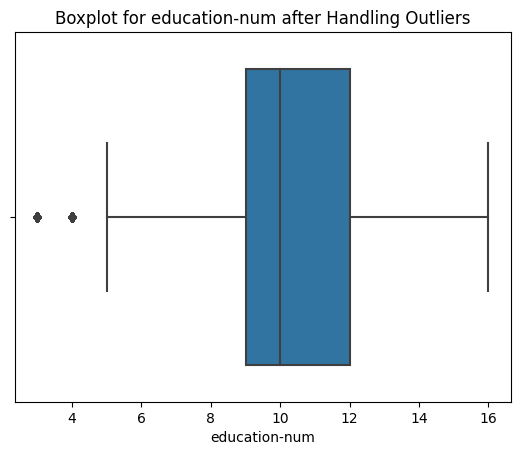

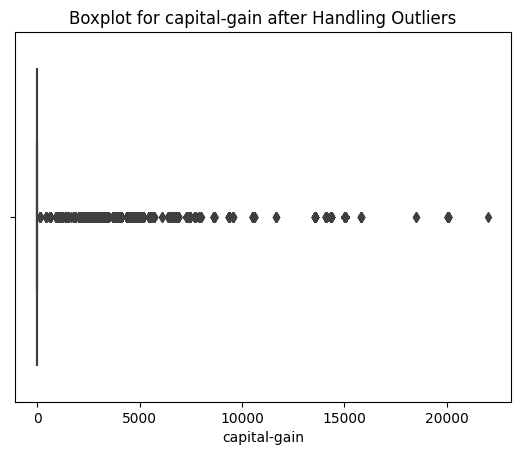

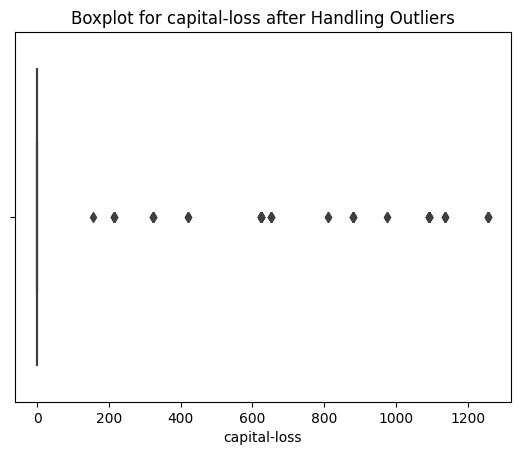

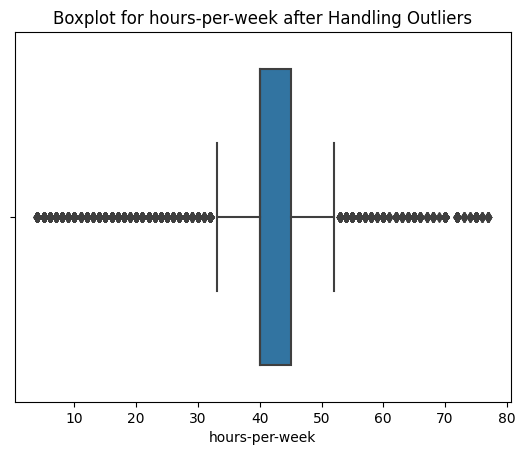

In [37]:
for feature in numerical_features:
    plot_distributions(feature)

outliers = np.abs(stats.zscore(X[numerical_features])) > 3

for feature in numerical_features:
    X[feature] = np.where(outliers[feature], np.median(X[feature]), X[feature])

for feature in numerical_features:
    sns.boxplot(x=X[feature])
    plt.title(f'Boxplot for {feature} after Handling Outliers')
    plt.show()